<a href="https://colab.research.google.com/github/talalqaiser/-Website-layout/blob/main/Make_Moons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_moons
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
x, y = make_moons(n_samples = 5000, noise = 0.05)
print (x.shape, y.shape)

(5000, 2) (5000,)


In [3]:
print(x)

[[ 1.3142651  -0.4291142 ]
 [ 1.14062456  0.02997148]
 [ 0.5343658   0.894442  ]
 ...
 [ 0.65318245  0.84729251]
 [ 1.73887442 -0.22212526]
 [ 1.83210888 -0.0671812 ]]


In [4]:
print(y)

[1 0 0 ... 0 1 1]


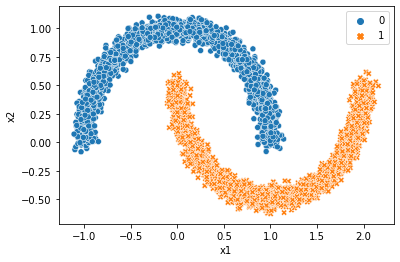

In [5]:
ax = sns.scatterplot(x = x[:,0], y = x[:,1], hue = y, style = y)
ax.set(xlabel = 'x1', ylabel = 'x2')
plt.show()


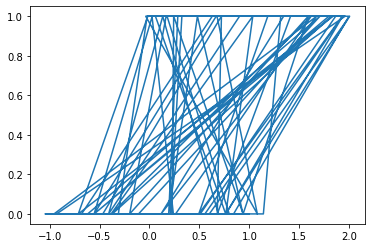

In [6]:
plt.plot(x[0:100,0], y[0:100])

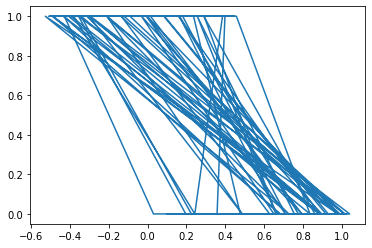

In [7]:
plt.plot(x[0:100,1], y[0:100])

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

scalar = MinMaxScaler()
xn = scalar.fit_transform(x)

xtrain, xtest, y_train, y_test = train_test_split(xn, y, test_size = 0.2, random_state = 42, stratify = y)

print(xn)
print(y_train.shape)
print(xtrain.shape)
ytrain = to_categorical(y_train)
ytest = to_categorical(y_test)
print([ytrain.shape, ytest.shape])

[[0.74166807 0.1140601 ]
 [0.68850901 0.37880237]
 [0.50290637 0.87731908]
 ...
 [0.53928141 0.85012925]
 [0.87165977 0.23342501]
 [0.90020297 0.32277705]]
(4000,)
(4000, 2)
[(4000, 2), (1000, 2)]


In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras import layers

model = Sequential([
    layers.Dense(64, activation='relu', input_shape=[2]),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='softmax')])

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()
history = model.fit(xtrain, ytrain, epochs=60, batch_size=32, validation_split=0.1, verbose=0)

test_loss, test_acc = model.evaluate(xtest, ytest)
print('test loss:', test_loss)
print('test accuracy:', test_acc)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,338
Trainable params: 2,338
Non-trainable params: 0
_________________________________________________________________
32/32 [==============================] - 0s 6ms/step - loss: 2.5159e-04 - accuracy: 1.0000
test loss: 0.0002515854430384934
test accuracy: 1.0


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,338
Trainable params: 2,338
Non-trainable params: 0
_________________________________________________________________


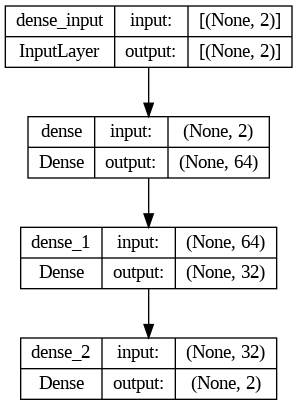

In [11]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [12]:
history = model.fit(xtrain, ytrain, epochs=60, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/60
100/100 [==============================] - 1s 9ms/step - loss: 2.5288e-04 - accuracy: 1.0000 - val_loss: 2.9499e-04 - val_accuracy: 1.0000
Epoch 2/60
100/100 [==============================] - 1s 5ms/step - loss: 1.9284e-04 - accuracy: 1.0000 - val_loss: 3.7405e-04 - val_accuracy: 1.0000
Epoch 3/60
100/100 [==============================] - 1s 7ms/step - loss: 1.8620e-04 - accuracy: 1.0000 - val_loss: 2.4754e-04 - val_accuracy: 1.0000
Epoch 4/60
100/100 [==============================] - 0s 4ms/step - loss: 2.0418e-04 - accuracy: 1.0000 - val_loss: 3.1807e-04 - val_accuracy: 1.0000
Epoch 5/60
100/100 [==============================] - 1s 6ms/step - loss: 1.5638e-04 - accuracy: 1.0000 - val_loss: 2.9436e-04 - val_accuracy: 1.0000
Epoch 6/60
100/100 [==============================] - 1s 5ms/step - loss: 1.5077e-04 - accuracy: 1.0000 - val_loss: 2.2529e-04 - val_accuracy: 1.0000
Epoch 7/60
100/100 [==============================] - 1s 8ms/step - loss: 1.2594e-04 - accuracy: 1.0

In [13]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
ypred = np.argmax(model.predict(xtest), axis=1)
print('Confusion matrix:')
print(confusion_matrix(y_test, ypred))

print('Precision score = %0.3f' % precision_score(y_test, ypred, average='weighted'))
print('Recall score = %0.3f' % recall_score(y_test, ypred, average='weighted'))

32/32 [==============================] - 0s 999us/step
Confusion matrix:
[[500   0]
 [  0 500]]
Precision score = 1.000
Recall score = 1.000


13/13 [==============================] - 0s 1ms/step
(20, 20)
(400,)
400


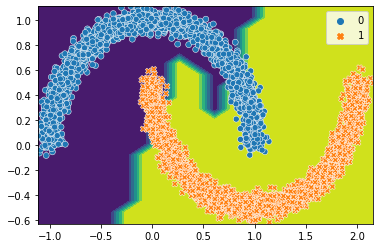

In [14]:
xmin = np.min(x[:,0])#-0.5
xmax = np.max(x[:,0])#+0.5

ymin = np.min(x[:,1])#-0.5
ymax = np.max(x[:,1])#+0.5

xg, yg = np.meshgrid(np.linspace(xmin, xmax, num=20), np.linspace(ymin, ymax, num=20))
z = np.argmax(model.predict(np.hstack((xg.reshape(-1,1), yg.reshape(-1,1)))),axis=1)
print(xg.shape)
print(z.shape)
print(np.size(xg))

plt.contourf(xg, yg, z.reshape(xg.shape))
ax = plt.gca()
sns.scatterplot(x=x[:,0],y=x[:,1], hue=y, style=y, ax=ax)
plt.show()

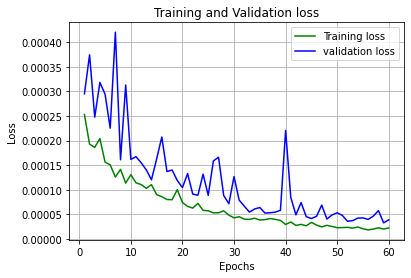

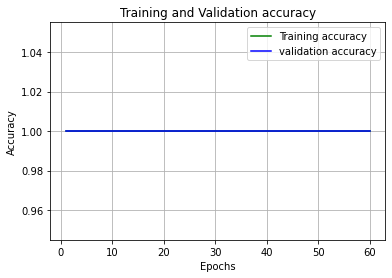

In [15]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,61)
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,61)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()